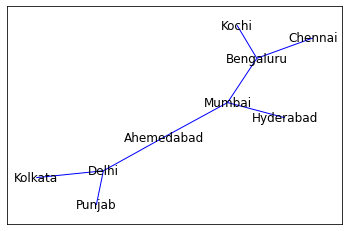

In [131]:
import numpy as np
import pylab as plt
import networkx as nx
dict1={'Kochi':0,'Ahemedabad':1,'Mumbai':2,'Bengaluru':3,'Punjab':4,'Delhi':5,'Chennai':6,'Hyderabad':7,'Kolkata':8}
#Initializing points
points_list = [(0,3), (1,5), (5,1), (5,4), (1,2), (2,3), (2,7), (3,6), (5,8)]
 
goal = 7
mapping={0:'Kochi', 1:'Ahemedabad', 2:'Mumbai', 3:'Bengaluru', 4:'Punjab', 5:'Delhi', 6:'Chennai', 7:'Hyderabad',8:'Kolkata'}
G=nx.Graph()
G.add_edges_from(points_list)
G = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g',node_shape='')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)

plt.show()


In [119]:
NO_OF_POINTS = 9
 
#Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1
 
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
 
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]]= 0

(0, 3)
(1, 5)
(5, 1)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(3, 6)
(5, 8)


In [120]:
R[goal,goal]= 150
R

matrix([[ -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.]])

In [121]:
# Q matrix
Q = np.matrix (np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
print(Q)
# Gamma (learning parameter)
gamma = 0.8
# Initial state (Usually to be chosen at random)
initial_state = 1

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [122]:
# This function returns all available actions in the state given as # an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
# Get available actions in the current state
available_act = available_actions(initial_state)
# This function chooses at random which action to be performed within the range of all the available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
# Sample next action to be performed
action = sample_next_action(available_act)
print(available_act)
print(action)

[2 5]
2


In [123]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):  
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]   
    Q[current_state, action] = R[current_state, action] + gamma * max_value
update(initial_state,action,gamma)
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [124]:
# Train over 10 000 iterations(Re-iterate the # process above)
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
print(Q)

[[  0.    0.    0.  480.    0.    0.    0.    0.    0. ]
 [  0.    0.  600.    0.    0.  384.    0.    0.    0. ]
 [  0.  480.    0.  480.    0.    0.    0.  750.    0. ]
 [384.    0.  600.    0.    0.    0.  384.    0.    0. ]
 [  0.    0.    0.    0.    0.  384.    0.    0.    0. ]
 [  0.  480.    0.    0.  307.2   0.    0.    0.  307.2]
 [  0.    0.    0.  480.    0.    0.    0.    0.    0. ]
 [  0.    0.  600.    0.    0.    0.    0.  750.    0. ]
 [  0.    0.    0.    0.    0.  384.    0.    0.    0. ]]


In [125]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.     0.     0.    64.     0.     0.     0.     0.     0.  ]
 [  0.     0.    80.     0.     0.    51.2    0.     0.     0.  ]
 [  0.    64.     0.    64.     0.     0.     0.   100.     0.  ]
 [ 51.2    0.    80.     0.     0.     0.    51.2    0.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.     0.  ]
 [  0.    64.     0.     0.    40.96   0.     0.     0.    40.96]
 [  0.     0.     0.    64.     0.     0.     0.     0.     0.  ]
 [  0.     0.    80.     0.     0.     0.     0.   100.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.     0.  ]]


In [126]:
current_state = int(input('''Enter Current state:
                                            0: Kochi
                                            1: Ahemedabad
                                            2: Mumbai
                                            3: Bengaluru
                                            4: Punjab
                                            5: Delhi
                                            6: Chennai
                                            7: Hyderabad
                                            8: Kolkata
                                      '''))
steps = [current_state]
while current_state != goal:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
# Print selected sequence of steps
print("Selected path to reach Hyderabad:")
print(steps)

Enter Current state:
                                            0: Kochi
                                            1: Ahemedabad
                                            2: Mumbai
                                            3: Bengaluru
                                            4: Punjab
                                            5: Delhi
                                            6: Chennai
                                            7: Hyderabad
                                            8: Kolkata
                                      0
Selected path to reach Hyderabad:
[0, 3, 2, 7]
